# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
#from api_keys import weather_api_key
weather_api_key="8de43b5e65222df443fb8c810a732068"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
city_data = []

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london"
number = 0 
sets = 1
print("Beginning Data Retrieval")     
print("-----------------------------")
#city not found not working##

for city in cities:
# Build query URL
    time.sleep(1)
    try:
        print (f"Processing Record {number} of Set {sets} | {city}")
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        if number < 50:
            number = number +1
        if number >= 50:
            sets = sets +1
            number = 0
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json ['clouds'] ['all']
        wind_speed = weather_json['wind']['speed']
        name = weather_json['name']
        date = weather_json['dt']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        country = weather_json['sys']['country']
        city_data.append({'Name':name, 
            'Country':country, 
            'Date':date,
            'Max Temp':max_temp,
            'Humidity':humidity,
            'Cloudiness':cloudiness,
            'Wind_Speed':wind_speed,
            'Latitude':lat,
            'Longitude':lng})
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | ushuaia
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | pryazha
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | barcelos
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | udachnyy
Processing Record 8 of Set 1 | yuncheng
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | pontes e lacerda
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | meyungs
City not found. Skipping...
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | fuente de oro
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | santo angelo
Processing Record 20 of Set 1 | jalu
Proces

Processing Record 38 of Set 4 | morondava
Processing Record 39 of Set 4 | senador guiomard
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | frederico westphalen
Processing Record 42 of Set 4 | marcona
City not found. Skipping...
Processing Record 43 of Set 4 | shenjiamen
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | tazmalt
Processing Record 46 of Set 4 | hailin
Processing Record 47 of Set 4 | fort dodge
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | geraldton
Processing Record 0 of Set 5 | agirish
Processing Record 1 of Set 5 | tarko-sale
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | soloneshnoye
Processing Record 4 of Set 5 | fare
Processing Record 5 of Set 5 | pljevlja
Processing Record 6 of Set 5 | karlskoga
Processing Record 7 of Set 5 | lethem
Processing Record 8 of Set 5 | stephenville
Processing Record 9 of Set 5 | saint george
Processing Recor

Processing Record 26 of Set 8 | berlevag
Processing Record 27 of Set 8 | pacifica
Processing Record 28 of Set 8 | isernia
Processing Record 29 of Set 8 | prainha
Processing Record 30 of Set 8 | kashi
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | west wendover
Processing Record 33 of Set 8 | kozhva
Processing Record 34 of Set 8 | camabatela
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | dvinskoy
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | marawi
Processing Record 39 of Set 8 | azrow
City not found. Skipping...
Processing Record 40 of Set 8 | mareeba
Processing Record 41 of Set 8 | anadyr
Processing Record 42 of Set 8 | shar
Processing Record 43 of Set 8 | trybukhivtsi
Processing Record 44 of Set 8 | karaton
Processing Record 45 of Set 8 | tyukhtet
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | tilichiki
Processing Record 48 of Set 8 | vilyuysk


Processing Record 16 of Set 12 | benghazi
Processing Record 17 of Set 12 | vallenar
Processing Record 18 of Set 12 | aschersleben
Processing Record 19 of Set 12 | sambava
Processing Record 20 of Set 12 | glendive
Processing Record 21 of Set 12 | sao joao da barra
Processing Record 22 of Set 12 | soyo
Processing Record 23 of Set 12 | williams lake
Processing Record 24 of Set 12 | clinton
Processing Record 25 of Set 12 | gunjur
Processing Record 26 of Set 12 | meulaboh
Processing Record 27 of Set 12 | abu dhabi
Processing Record 28 of Set 12 | caravelas
Processing Record 29 of Set 12 | lujan
Processing Record 30 of Set 12 | vadum
Processing Record 31 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 32 of Set 12 | kanker
Processing Record 33 of Set 12 | bairiki
Processing Record 34 of Set 12 | maine-soroa
Processing Record 35 of Set 12 | port keats
Processing Record 36 of Set 12 | monterey
Processing Record 37 of Set 12 | itarema
Processing Record 38 of Set 12 | ngung

In [15]:
city_data


[{'Name': 'Ushuaia',
  'Country': 'AR',
  'Date': 1587151516,
  'Max Temp': 287.15,
  'Humidity': 30,
  'Cloudiness': 20,
  'Wind_Speed': 7.7,
  'Latitude': -54.8,
  'Longitude': -68.3},
 {'Name': 'Albany',
  'Country': 'US',
  'Date': 1587151507,
  'Max Temp': 283.15,
  'Humidity': 23,
  'Cloudiness': 90,
  'Wind_Speed': 1.34,
  'Latitude': 42.6,
  'Longitude': -73.97},
 {'Name': 'Pryazha',
  'Country': 'RU',
  'Date': 1587151535,
  'Max Temp': 274.15,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind_Speed': 4,
  'Latitude': 61.69,
  'Longitude': 33.62},
 {'Name': 'Nikolskoye',
  'Country': 'RU',
  'Date': 1587151536,
  'Max Temp': 276.15,
  'Humidity': 89,
  'Cloudiness': 90,
  'Wind_Speed': 8,
  'Latitude': 59.7,
  'Longitude': 30.79},
 {'Name': 'Barcelos',
  'Country': 'PT',
  'Date': 1587151269,
  'Max Temp': 288.15,
  'Humidity': 87,
  'Cloudiness': 40,
  'Wind_Speed': 4.1,
  'Latitude': 41.54,
  'Longitude': -8.62},
 {'Name': 'Jamestown',
  'Country': 'US',
  'Date': 1587151538,
 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
citydata_df = pd.DataFrame(city_data)

In [22]:
citydata_df

,Name,Country,Date,Max Temp,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,Ushuaia,AR,1587151516,287.15,30,20,7.70,-54.80,-68.30
1,Albany,US,1587151507,283.15,23,90,1.34,42.60,-73.97
2,Pryazha,RU,1587151535,274.15,87,100,4.00,61.69,33.62
3,Nikolskoye,RU,1587151536,276.15,89,90,8.00,59.70,30.79
4,Barcelos,PT,1587151269,288.15,87,40,4.10,41.54,-8.62
...,...,...,...,...,...,...,...,...,...
562,Muisne,EC,1587152191,302.15,83,75,3.60,0.60,-80.03
563,Boyolangu,ID,1587152192,297.89,83,99,1.09,-8.12,111.89
564,Pemberton,CA,1587152194,282.15,57,90,1.05,50.32,-122.80
565,Ilo,PE,1587152195,296.39,66,1,3.75,-17.64,-71.34


In [25]:
citydata_df.count()

Name          567
Country       567
Date          567
Max Temp      567
Humidity      567
Cloudiness    567
Wind_Speed    567
Latitude      567
Longitude     567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

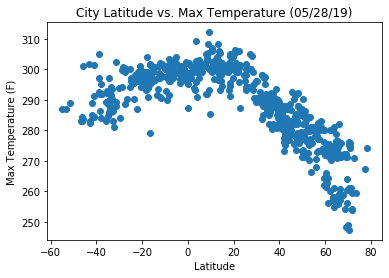

In [28]:
x_axis = citydata_df['Latitude']
y_axis = citydata_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(False)

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

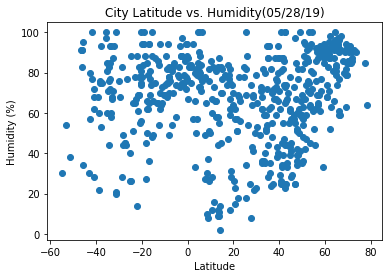

In [31]:
x_axis = citydata_df['Latitude']
y_axis = citydata_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o")
plt.title("City Latitude vs. Humidity(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

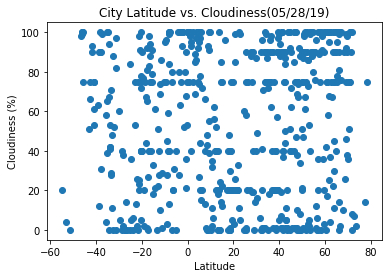

In [32]:
x_axis = citydata_df['Latitude']
y_axis = citydata_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o")
plt.title("City Latitude vs. Cloudiness(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

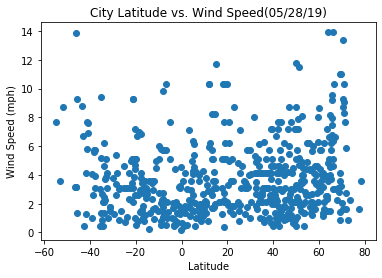

In [33]:
x_axis = citydata_df['Latitude']
y_axis = citydata_df['Wind_Speed']

plt.scatter(x_axis, y_axis, marker="o")
plt.title("City Latitude vs. Wind Speed(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [43]:
citydata_df.dtypes

Name           object
Country        object
Date            int64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind_Speed    float64
Latitude      float64
Longitude     float64
dtype: object

In [45]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = citydata_df.loc[citydata_df["Latitude"] >= 0]
northern_df

,Name,Country,Date,Max Temp,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
1,Albany,US,1587151507,283.15,23,90,1.34,42.60,-73.97
2,Pryazha,RU,1587151535,274.15,87,100,4.00,61.69,33.62
3,Nikolskoye,RU,1587151536,276.15,89,90,8.00,59.70,30.79
4,Barcelos,PT,1587151269,288.15,87,40,4.10,41.54,-8.62
5,Jamestown,US,1587151538,273.15,86,90,3.60,42.10,-79.24
...,...,...,...,...,...,...,...,...,...
558,Hirara,JP,1587152187,296.16,83,60,4.81,24.80,125.28
561,Rome,US,1587151924,279.82,35,20,5.70,43.21,-75.46
562,Muisne,EC,1587152191,302.15,83,75,3.60,0.60,-80.03
564,Pemberton,CA,1587152194,282.15,57,90,1.05,50.32,-122.80


In [46]:
southern_df = citydata_df.loc[citydata_df["Latitude"] < 0]
southern_df

,Name,Country,Date,Max Temp,Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,Ushuaia,AR,1587151516,287.15,30,20,7.70,-54.80,-68.30
10,Pontes e Lacerda,BR,1587151543,299.20,49,18,2.96,-15.23,-59.34
12,Hobart,AU,1587151548,283.15,57,75,6.70,-42.88,147.33
13,Mataura,NZ,1587151549,283.15,91,100,3.13,-46.19,168.86
16,Santo Ângelo,BR,1587151552,299.82,44,2,4.10,-28.30,-54.26
...,...,...,...,...,...,...,...,...,...
551,Guiratinga,BR,1587152179,295.35,77,94,0.81,-16.35,-53.76
559,Palu,ID,1587152188,297.62,78,21,1.26,-0.89,119.87
560,Gamba,GA,1587152189,298.62,88,93,4.43,-2.65,10.00
563,Boyolangu,ID,1587152192,297.89,83,99,1.09,-8.12,111.89


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.880168922590267


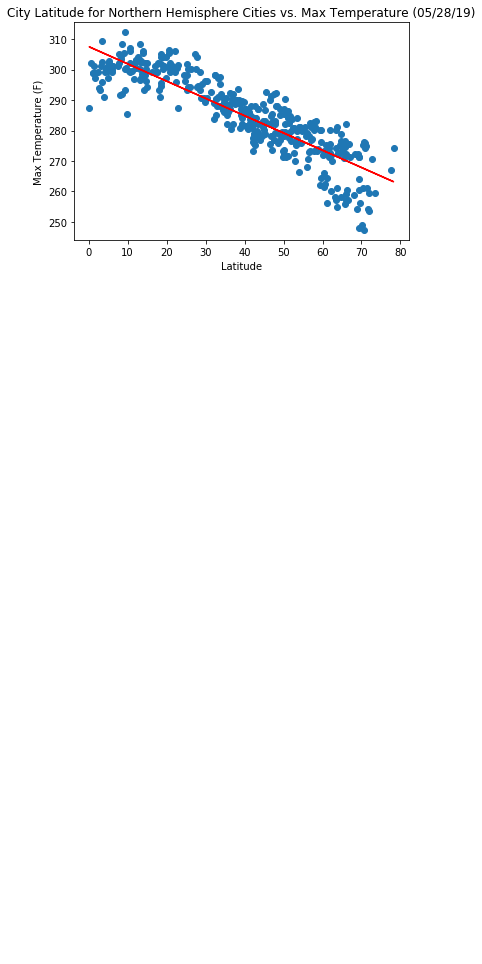

In [56]:
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude for Northern Hemisphere Cities vs. Max Temperature (05/28/19)")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6191889689557254


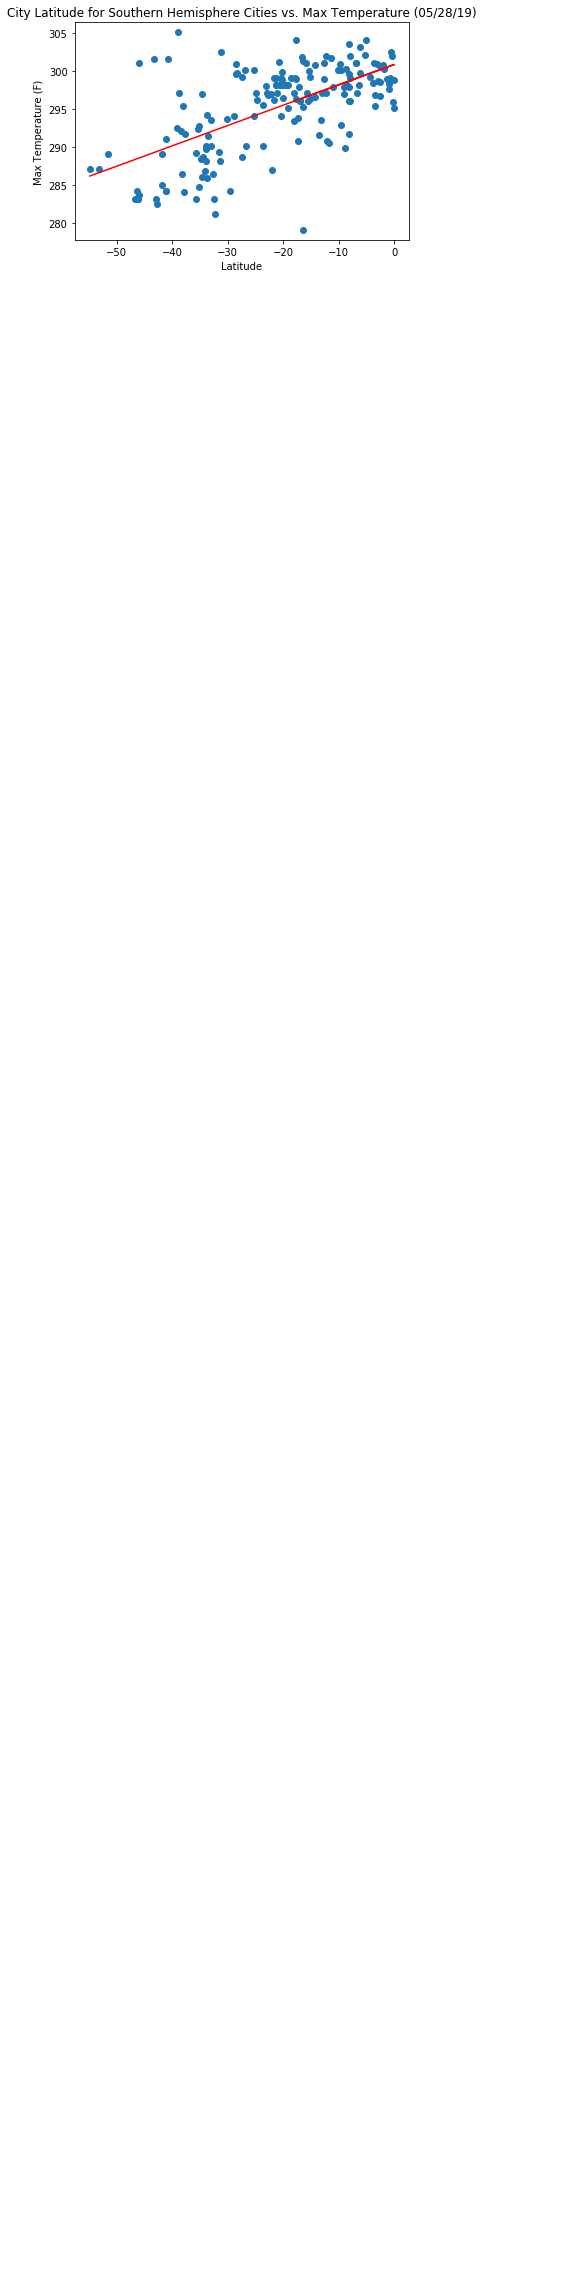

In [57]:
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude for Southern Hemisphere Cities vs. Max Temperature (05/28/19)")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3172744341863057


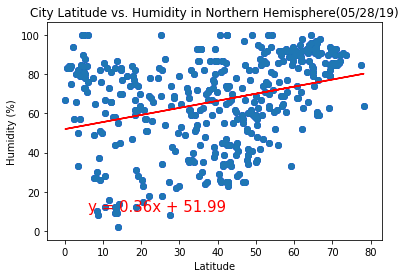

In [63]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("City Latitude vs. Humidity in Northern Hemisphere(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2416064287235333


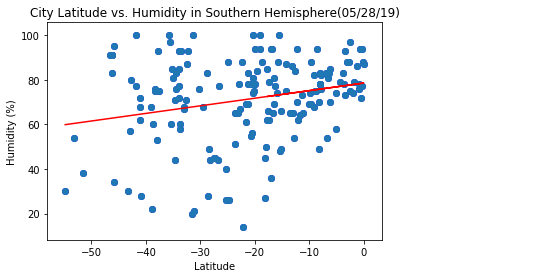

In [64]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("City Latitude vs. Humidity in Southern Hemisphere(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12890960835026594


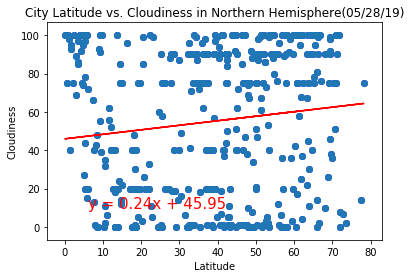

In [65]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("City Latitude vs. Cloudiness in Northern Hemisphere(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.053957380188472286


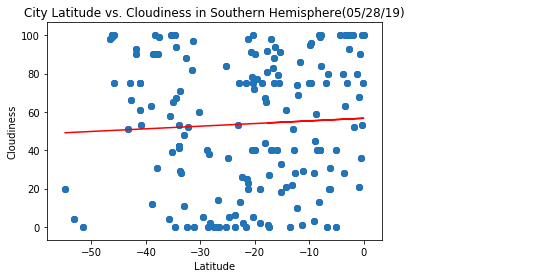

In [66]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("City Latitude vs. Cloudiness in Southern Hemisphere(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1902371557393998


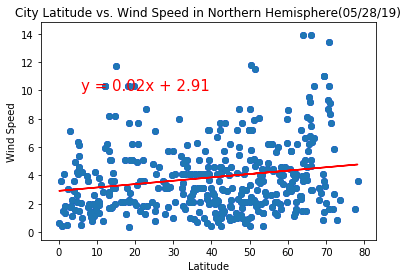

In [68]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind_Speed']

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("City Latitude vs. Wind Speed in Northern Hemisphere(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28721345290479516


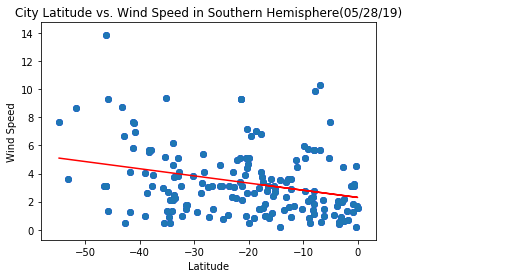

In [69]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind_Speed']

plt.scatter(x_values, y_values, marker="o", color="blue")
plt.title("City Latitude vs. Wind Speed in Southern Hemisphere(05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()